## Gradient Descent Implementation #2
Here we make minor improvements of our first implementation by vectorizing the parameters to be estimated.  This is in preperation for optimizing a more general number of parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

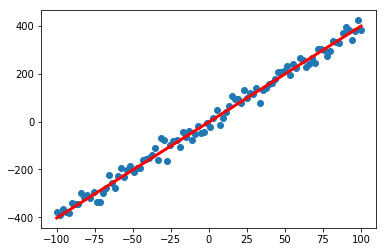

In [4]:
n = 100
xs = np.linspace(-100, 100, n)
x = np.stack([np.ones(n),
              xs], axis=1)

expected_thetas = np.array([-2., 4])

y = x @ expected_thetas + np.random.normal(0, 25, n)

plt.scatter(xs, y)
plt.plot(xs, x @ expected_thetas, linewidth='3', color='red')
plt.show()

The analytic solution $(x^Tx)^{-1}x^Ty$ is as follows:

In [5]:
analytic_thetas = np.linalg.inv(x.T @ x) @ x.T @ y

final cost:       259.7823105894424
actual params:    [-2.  4.]
analytic params:  [0.56269217 3.96576196]
estimated params: [1.12426027e-03 3.96140177e+00]


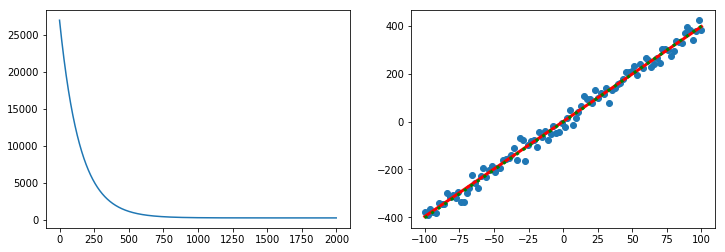

In [12]:
learning_rate = 1e-6
iterations = 2000

def cost(error):
    N = len(error)
    return .5 * 1. / N * error.dot(error)

thetas = np.zeros(2)
costs = []

for _ in range(iterations):
    yp = x @ thetas
    error = yp - y
    costs.append(cost(error))
    gradient = 1. / n * (error @ x)
    thetas -= learning_rate * gradient

print("final cost:      ", costs[-1])
print("actual params:   ", expected_thetas)
print("analytic params: ", analytic_thetas)
print("estimated params:", thetas)

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(costs)

ax2.scatter(xs, y)
ax2.plot(xs, x @ thetas, linewidth=3, color='red')
ax2.plot(xs, x @ expected_thetas, linewidth='3', color='green', linestyle=':')

plt.show()